# Analiza wrażliwości

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from simulation import run_simulation

%matplotlib inline

In [2]:
n_simulations = 100

## Ile klenerów zatrudnić

In [17]:
max_male = 10
max_female = 10

male_bartenders = np.arange(0, max_male+1)
female_bartenders = np.arange(0, max_female+1)
bartender_results = np.zeros((max_male+1, max_female+1))

for i in range(bartender_results.shape[0]):
    for j in range(bartender_results.shape[1]):
        # creating unique combination of male and female bartenders
        barternders = [False] * male_bartenders[i] + [True] * female_bartenders[j]
        #running simulation
        results, _ = run_simulation(n_simulations=n_simulations, bartenders=barternders)
        
        #appending results
        bartender_results[i, j] = results.mean()

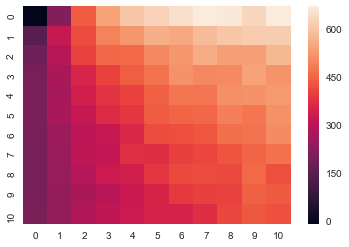

In [18]:
ax = sns.heatmap(bartender_results)
plt.show()

## Jaka strategia cenowa

In [5]:
results_expensive, _ = run_simulation(n_simulations=n_simulations, drink_price=4, patience_threshold=10)
results_cheap, _ = run_simulation(n_simulations=n_simulations)
results_super_cheap, _ = run_simulation(
    n_simulations=n_simulations,
    drink_price=1,
    patience_threshold=20,
    customer_lambda=10)

In [6]:
print("średnia:")
print("droższe drinki: " + str(results_expensive.mean()))
print("tańsze drinki: " + str(results_cheap.mean()))
print("super tanie drinki: " + str(results_super_cheap.mean()))

print("\nodchylenie:")
print("droższe drinki: " + str(results_expensive.std()))
print("tańsze drinki: " + str(results_cheap.std()))
print("super tanie drinki: " + str(results_super_cheap.std()))

średnia:
droższe drinki: 449.605980794
tańsze drinki: 322.591928015
super tanie drinki: 265.241767628

odchylenie:
droższe drinki: 123.789764702
tańsze drinki: 69.6523768941
super tanie drinki: 96.3728291358


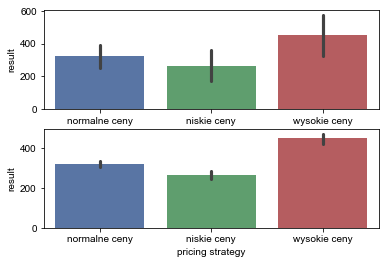

In [7]:
plt.figure(figsize=(20,10))
f, axes = plt.subplots(2, 1)
sns.set(style="whitegrid")
df_to_plot = pd.DataFrame(
    {
        "pricing strategy": 
            ["normalne ceny"] * n_simulations + 
            ["niskie ceny"] * n_simulations + 
            ["wysokie ceny"] * n_simulations,
        "result": np.concatenate((results_cheap, results_super_cheap, results_expensive), axis=0)
    }
)
ax = sns.barplot(x="pricing strategy", y="result", data=df_to_plot, ci="sd", ax=axes[0]) # standard diviation
ax = sns.barplot(x="pricing strategy", y="result", data=df_to_plot, ci=95, ax=axes[1]) # some bootstrap :D

## Zatrudnianie ładniejszych kelnerek

In [8]:
results_normal, _ = run_simulation(n_simulations=n_simulations)
results_beautiful, _ = run_simulation(n_simulations=n_simulations, flirt_time=25, avg_tip=10)

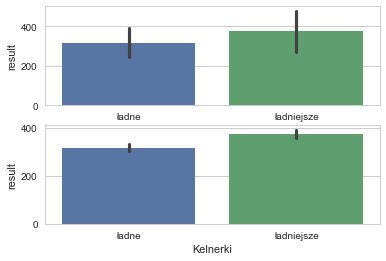

In [9]:
plt.figure(figsize=(20,10))
f, axes = plt.subplots(2, 1)
sns.set(style="whitegrid")
df_to_plot = pd.DataFrame(
    {
        "Kelnerki": 
            ["ładne"] * n_simulations + ["ładniejsze"] * n_simulations,
        "result": np.concatenate((results_normal, results_beautiful), axis=0)
    }
)
ax = sns.barplot(x="Kelnerki", y="result", data=df_to_plot, ci="sd", ax=axes[0]) # standard diviation
ax = sns.barplot(x="Kelnerki", y="result", data=df_to_plot, ci=95, ax=axes[1]) # some bootstrap :D

## Zajęcie w kolejce

In [10]:
import tqdm
patience_results = np.zeros(11)

for patience in tqdm.tqdm(range(len(patience_results))):
    results, _ = run_simulation(n_simulations=int(n_simulations), patience_threshold=patience)
    patience_results[patience] = results.mean()

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:05<00:00,  1.91it/s]


In [11]:
patience_results

array([ 195.76623141,  223.72733167,  225.35690155,  256.15680749,
        254.81266969,  282.42062451,  281.97115456,  300.8190435 ,
        293.07605504,  289.79073729,  312.50437161])

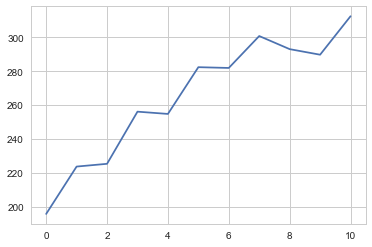

In [12]:
sns.set(style="whitegrid")
plt.plot(patience_results)
plt.show()

## Lepszy wystrój, więcej klientów, wyższa strata

In [13]:
import tqdm
decor_results = np.zeros(20)

for decor in tqdm.tqdm(range(1, len(decor_results))):
    results, _ = run_simulation(
        n_simulations=int(n_simulations/10), 
        shootout_loss=5*decor, 
        customer_lambda=(2*decor+5))
    decor_results[decor] = results.mean()

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:01<00:00, 16.92it/s]


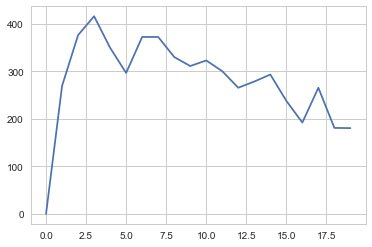

In [14]:
sns.set(style="whitegrid")
plt.plot(decor_results)
plt.show()